# 5.0 Visualisierung mit Seaborn
Seaborn baut auf Matplotlib auf und vereinfacht die Darstellung erheblich.

Für mehr Informationen gehe zu: https://seaborn.pydata.org/tutorial.html

In [ ]:
# Alle nötigen Bibliotheken importieren
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

## 5.1 Visualisierung für Kategoriale Daten

In [ ]:
# wie andere Bibliotheken hat auch seaborn eigene Datensätze vorrätig. Hier das erste Beispiel mit Trinkgeld.
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


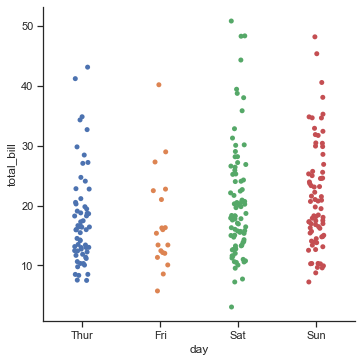

In [ ]:
# Alle Daten überlappend anzeigen
sns.catplot(x="day", y="total_bill", data=tips)

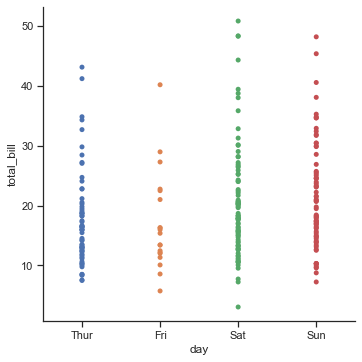

In [ ]:
#ohne jitter
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)

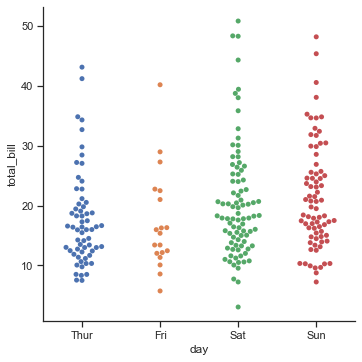

In [ ]:
# überlappende Elemente anzeigen lassen
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

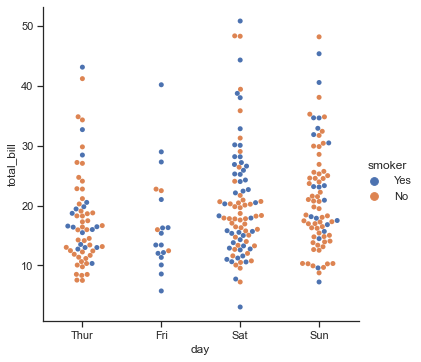

In [ ]:
# nach Kategorie Geschlecht farblich hervorheben
sns.catplot(x="day", y="total_bill", hue="smoker", kind="swarm", data=tips)

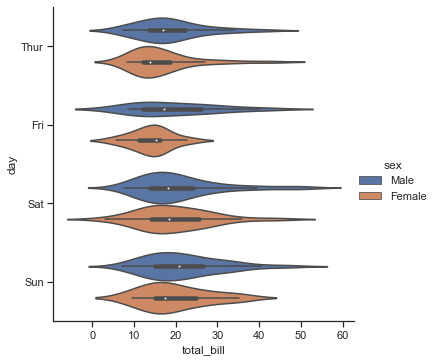

In [ ]:
# Wie wäre es mit einem Violin-Plot
sns.catplot(x="total_bill", y="day", hue="sex", kind="violin", data=tips)

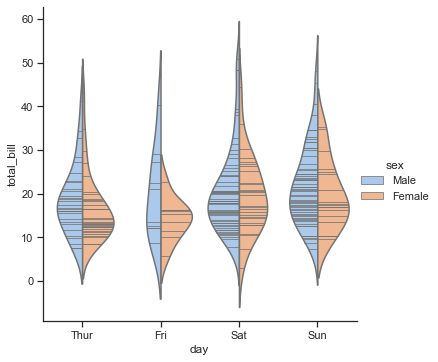

In [ ]:
# ein Violin-Plot mit Auftrennung nach dem Geschlecht, jedoch im Violinplot selbst
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", inner="stick", split=True, palette="pastel", data=tips)

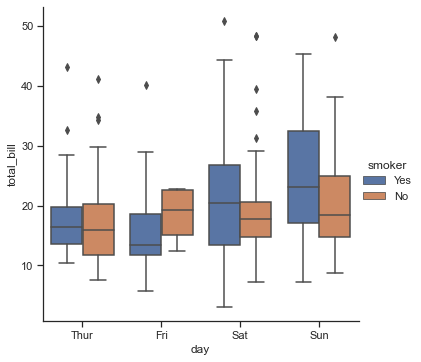

In [ ]:
# oder ein Box-Plot getrennt nach Rauchern
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)

In [ ]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


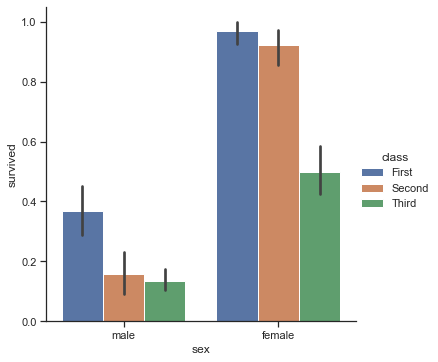

In [ ]:
# oder einem Säulendiagramm. Hier am Datensatz der Titanic
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

## 5.2 Visualisierungen für Regressionsdaten

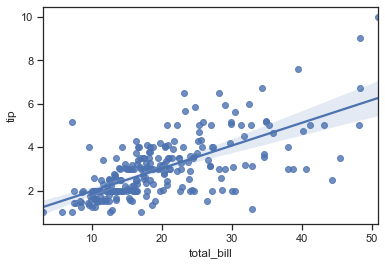

In [ ]:
# Darstellung einer Regressionsgeraden mit 95% Konfidenz
sns.regplot(x="total_bill", y="tip", data=tips);

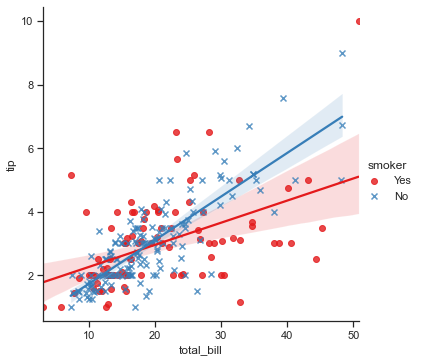

In [ ]:
# Unterteilung der Klassen nach Farbe und Form
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

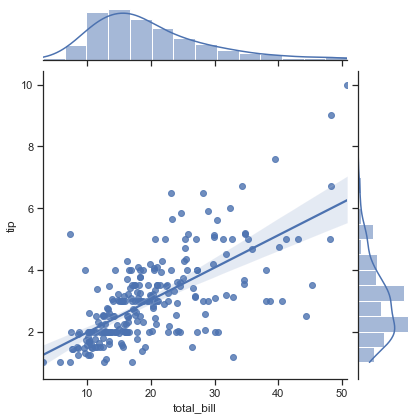

In [ ]:
# Plotten in mehreren Kontexten
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

In [ ]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
from pandasgui import show
show(tips)

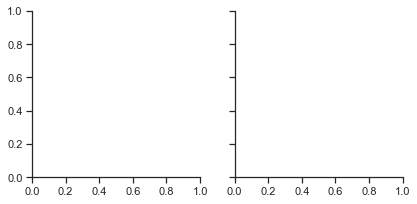

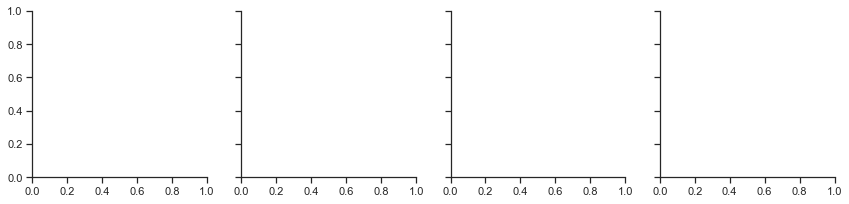

In [ ]:
# Mehrere Klassen in eigenen Diagrammen darstellen mit der Funktion FacetGrid()
# Zunächst werden zwei Grafikrahmen initialisiert. Denn unter time findet sich Dinner und Lunch
g = sns.FacetGrid(tips, col="time")
# Darunter werden weitere vier Rahmen initialisiert. Denn unter day findet sich Thursday bis Sunday
h = sns.FacetGrid(tips, col="day")

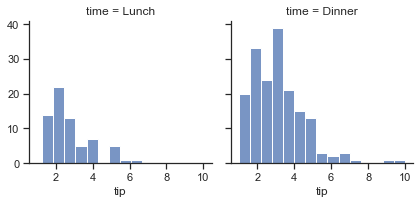

In [ ]:
# und jetzt befüllen wir die oberen beiden Rahmen mit den nötigen Daten in Form von Histogrammdaten
g = sns.FacetGrid(tips, col="time")
g.map(sns.histplot, "tip")

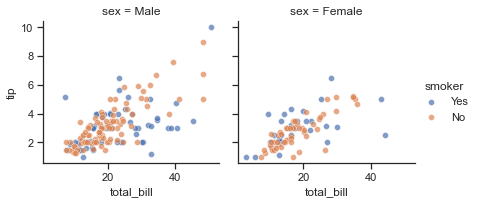

In [ ]:
# wieder eine farbliche Hervorhebung in den jeweiligen Diagrammen
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()

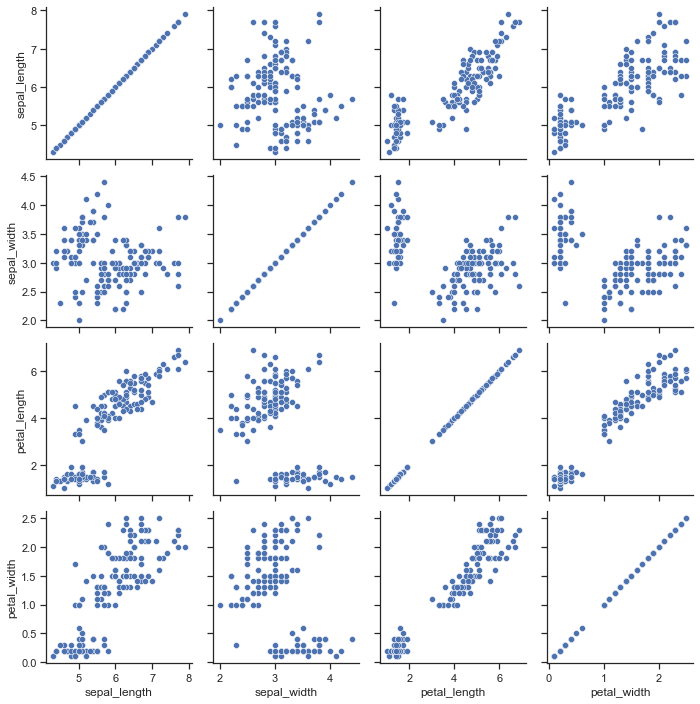

In [ ]:
iris = sns.load_dataset("iris")
# Darstellung eines Multi-Scatterplots mit zwei Zeilen
g = sns.PairGrid(iris)
g.map(sns.scatterplot)

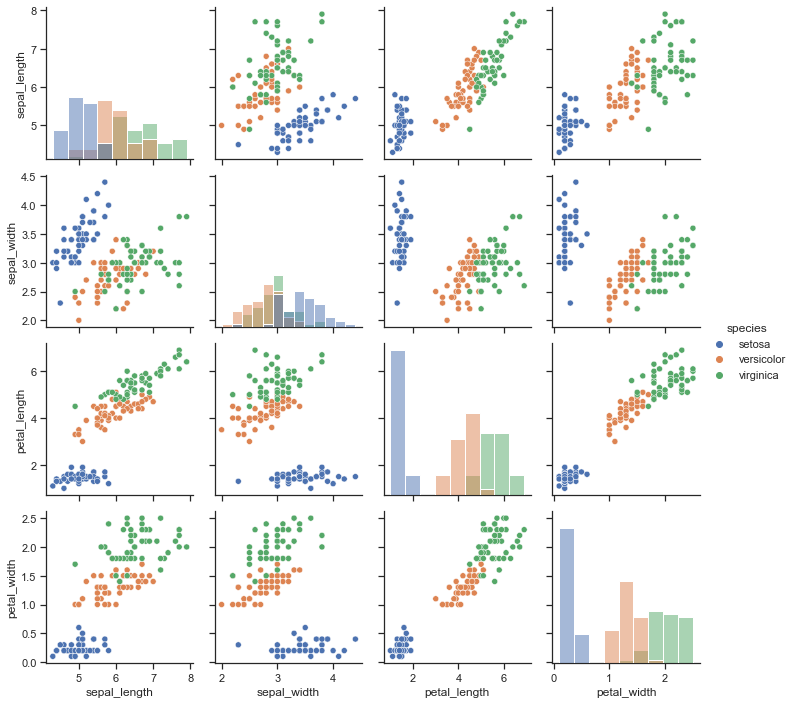

In [ ]:
# auch hier kann man nach Kategorien farblich hervorheben, bzw. Histogramme für die eigene Gegenüberstellung einbinden
g = sns.PairGrid(iris, hue="species")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

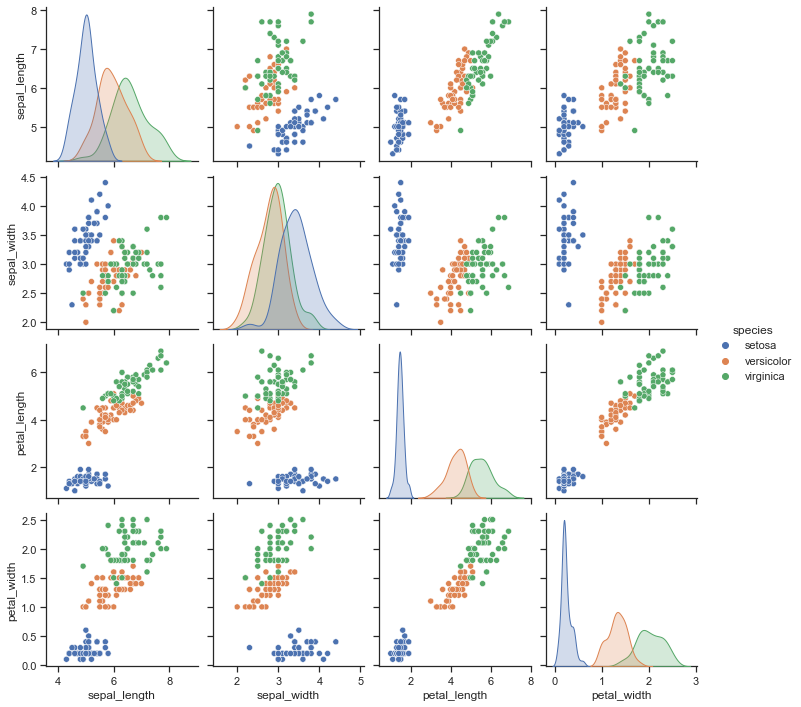

In [ ]:
# das Ganze etwas kompakter?
sns.pairplot(iris, hue="species", height=2.5)